# Optimisation: xNES

This example shows you how to run a global optimisation with [xNES](http://pints.readthedocs.io/en/latest/optimisers/xnes.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time m:s
0     2      1891033   1891033    0:00.0
1     6      1588996   1588996    0:00.0
2     11     430898.1  430898.1   0:00.0
3     16     430898.1  1.48e+07   0:00.0
20    117    105591.9  108344.6   0:00.0
40    237    105214.9  105219.1   0:00.0
60    357    105213.3  105213.3   0:00.1
80    477    105213.3  105213.3   0:00.1
100   597    105213.3  105213.3   0:00.1
120   717    105213.3  105213.3   0:00.1
140   837    105213.3  105213.3   0:00.2
160   957    105213.3  105213.3   0:00.2
180   1077   105213.3  105213.3   0:00.2
200   1197   105213.3  105213.3   0:00.2
220   1317   105213.3  105213.3   0:00.3
240   1437   105213.3  105213.3   0:00.3
260   1557   105213.3  105213.3   0:00.3
280   1677   105213.3  105213.3   0:00.4
300   1797   105213.3  105213.3   0:00.4
320   1917   105213.3  105213.3   0:00.4
340   2037   10

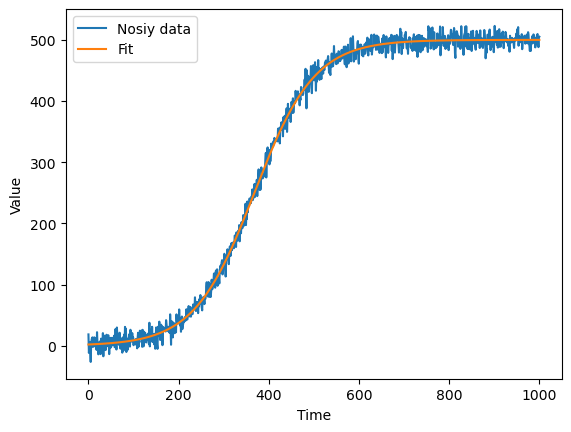

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.011, 400
sigma0 = [0.01, 100]
opt = pints.OptimisationController(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.XNES,
)
found_parameters, found_value = opt.run()

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values, label='Nosiy data')
plt.plot(times, problem.evaluate(found_parameters), label='Fit')
plt.legend()
plt.show()